In [ ]:
#Prediction task is to determine whether a person makes over 50K

# age: continuous.
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous.
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# education_num: continuous.
# marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital_gain: continuous.
# capital_loss: continuous.
# hours_per_week: continuous.
# native_country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
# income: >50K, <=50K.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Download data to google drive
import requests
file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

r = requests.get(file_url, stream = True)
with open("/content/drive/MyDrive/ML/adult.csv", "wb") as file:
  for block in r.iter_content(chunk_size = 1024):
    if block:
      file.write(block)

In [ ]:
import pandas as pd
import numpy as np

%cd "/content/drive/MyDrive/ML/"

data = pd.read_csv("adult.csv", sep=', ', header=None)

m_columns={0: 'age', 1: 'workclass', 2: 'fnlwgt', 3: 'education', 4: 'education_num', 5: 'marital_status', 6: 'occupation', 7: 'relationship', 8: 'race', 9: 'sex', 10: 'capital_gain', 11: 'capital_loss', 12: 'hours_per_week', 13: 'native_country', 14: 'income'}

data = data.rename(
  columns=m_columns
)

data.info()

/content/drive/MyDrive/ML


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# DATA CLEANUP

In [ ]:
#First identify columns with missing values
data.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [ ]:
#replace all '?' values with NaN and drop the rows (this removes about 6.7% of the rows)
#we could have also used SimpleImputer to replace missing values with the mean or median value
data['native_country'] = data['native_country'].replace('?',np.nan)
data['workclass'] = data['workclass'].replace('?',np.nan)
data['occupation'] = data['occupation'].replace('?',np.nan)

#The education_num feature seems to be a redundant index of the education column.
data.drop('education_num', axis = 1, inplace=True)

data.dropna(how='any',inplace=True)

In [ ]:
#Now when looking at martial_status, we have 7 misleading categories that could be made more useful if we boil them down to married or not-married.
data.replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'],['married', 'married', 'married'], inplace = True)
data.replace(['Divorced', 'Never-married', 'Separated', 'Widowed'],['not married', 'not married', 'not married', 'not married'], inplace = True)
data

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,not married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,not married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,married,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,not married,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,not married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#for c in data.columns:
#    print ("---- %s ---" % c)
#    print (data[c].value_counts())

### Feature Scaling

In [ ]:
# Scaling the target value is generally not required. (quote from Henrik in his "E2E ML project part 3" video from week 45 at timestamp 5:36).
# In this case the target value (income) is also categorical, so we simply map it to 1 or 0
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Since non of the categorical values are ordered (such as SMALL/MEDIUM/LARGE), we cannot just assign integers to the categories, since it could have a negative impact on the models accuracy, because it would assume one category to be "better or worse" than other categories.
# Instead we should use one-hot encoding, which just turns each possible value in a categorical attribute into its own binary attribute(column) in every row, and then gives it a 1 or a 0 based on whether said attribute was the actual value in said row.
# There are ALOT of categories, so we're gonna end up with a sh*t ton of columns (:
# info on One-hot encoding: https://datagy.io/sklearn-one-hot-encode/

features = data.drop('income', axis = 1)
skewed = ['capital_gain', 'capital_loss']
numerical = ['age', 'capital_gain', 'capital_loss', 'hours_per_week']
categorical = ['workclass', 'race', 'education', 'marital_status', 'occupation', 'relationship', 'sex', 'native_country']

features_log_transformed = pd.DataFrame(data=features) #take all features, except target feature (income)
features_log_transformed[skewed] = features[skewed].apply(lambda x: np.log(x + 1)) 
scaler = MinMaxScaler() #get the MinMaxScaler to scale numerical data into values between 0.0 to 1.0
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed) #copy our features
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical]) #scale the numerical values

features_final = pd.get_dummies(features_log_minmax_transform) #And finally one-hot encode our categorical features. #This is an ez-mode One-Hot Encoding function from Pandas. 
#features_final now contains all processed features (except income). In other words: Numerical features have been scaled, and categorical features have been one-hot encoded.
#We could have manually used OneHotEncoder, but pd.get_dummies is easier (:
features_final

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.301370,77516,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,83311,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,215646,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,234721,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,338409,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,257302,0.000000,0.0,0.377551,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0.315068,154374,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0.561644,151910,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,0.068493,201490,0.000000,0.0,0.193878,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
corr_matrix = data.corr()
corr_matrix["income"].sort_values(ascending=False)

income            1.000000
age               0.241998
hours_per_week    0.229480
capital_gain      0.221196
capital_loss      0.150053
fnlwgt           -0.008957
Name: income, dtype: float64

### Model

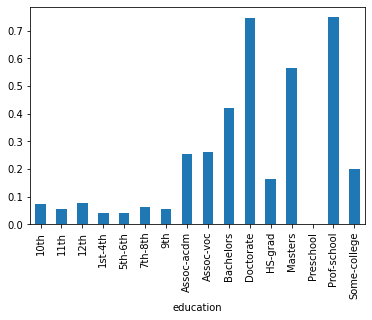

In [ ]:
data.groupby('education').income.mean().plot(kind='bar')

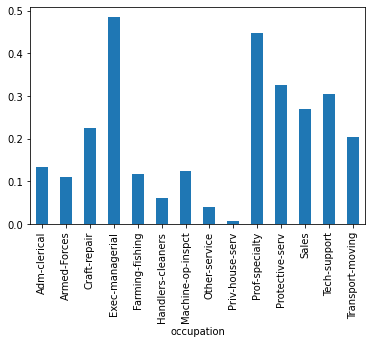

In [ ]:
data.groupby('occupation').income.mean().plot(kind='bar')

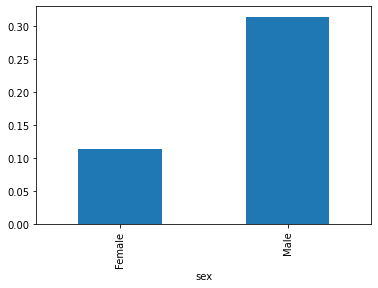

In [ ]:
data.groupby('sex').income.mean().plot(kind='bar')

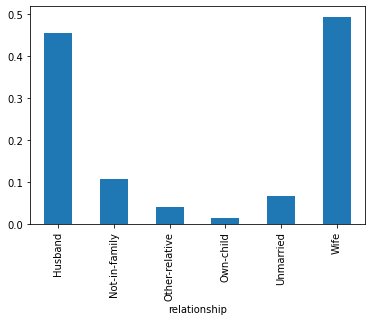

In [ ]:
data.groupby('relationship').income.mean().plot(kind='bar')

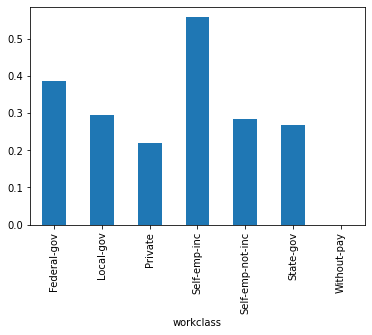

In [ ]:
data.groupby('workclass').income.mean().plot(kind='bar')

# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(features_final ,data['income'], test_size=0.3, random_state=100)
rf = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=100)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=100)

In [ ]:
predictions = rf.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
rf.predict_proba(X_test)
rf.classes_

importances = rf.feature_importances_
columns = data.drop('income', axis=1).columns
i = 0

while i < len(columns):
  print(f"The importance of feature '{columns[i]}' is {round(importances[i]* 100, 2)}%.")
  i += 1

The importance of feature 'age' is 15.23%.
The importance of feature 'workclass' is 16.43%.
The importance of feature 'fnlwgt' is 9.81%.
The importance of feature 'education' is 3.24%.
The importance of feature 'marital_status' is 8.58%.
The importance of feature 'occupation' is 0.51%.
The importance of feature 'relationship' is 0.61%.
The importance of feature 'race' is 1.12%.
The importance of feature 'sex' is 0.64%.
The importance of feature 'capital_gain' is 0.94%.
The importance of feature 'capital_loss' is 0.49%.
The importance of feature 'hours_per_week' is 0.01%.
The importance of feature 'native_country' is 0.31%.


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Create our predictions
predictions = rf.predict(X_test)

# Create confusion matrix
print(confusion_matrix(y_test, predictions))

# Display accuracy score
print(f"Accuracy Score: {round(accuracy_score(y_test, predictions)*100,2)}%")

# Display F1 score
print(f"F1 Score: {round(f1_score(y_test,predictions)*100,2)}%")

[[6246  505]
 [ 857 1441]]
Accuracy Score: 84.95%
F1 Score: 67.91%


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing

#split dataset into test and train data
X_train, X_test, y_train, y_test = train_test_split(features_final, data['income'], test_size=0.2)

#define gradientboostingclassifier along with it's hyperparameters
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, random_state=100, max_features=5)
gbc.fit(X_train, y_train)

#print(confusion_matrix(y_test, gbc.predict(X_test)))
print("GBC accuracy is %2.2f" % accuracy_score(y_test, gbc.predict(X_test)))

GBC accuracy is 0.86


In [ ]:
from sklearn.metrics import classification_report

pred=gbc.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4575
           1       0.77      0.62      0.69      1458

    accuracy                           0.86      6033
   macro avg       0.83      0.78      0.80      6033
weighted avg       0.86      0.86      0.86      6033



In [ ]:
#Parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':np.arange(100,500,100),
}

gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 400}
Train Score: 0.8669236130438205
Test Score: 0.8731974142217802


In [ ]:
grid = {
    'max_depth':[2,3,4,5,6,7] 
}

gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=400)
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'max_depth': 4}
Train Score: 0.8682912636555532
Test Score: 0.8736946792640478


# Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#Transform the data set into a data frame
#X axis = We concatenate the Relationship, Education,Race,Occupation columns concate using np.c_ provided by the numpy library
data_x = pd.DataFrame(np.c_[data['relationship'], data['education'], data['race'], data['occupation'], data['sex'], data['marital_status'], data['workclass']], columns = ['relationship','education','race','occupation','sex','marital_status','workclass'])
#Y axis = Our dependent variable or the income of adult i.e Income
data_y = pd.DataFrame(data.income)

#Initialize the linear regression model
reg = LogisticRegression()
#Split the data into 77% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.33, random_state=42)

In [ ]:
#Train our model with the training data
reg.fit(x_train, y_train.values.ravel())
#print our price predictions on our test data
y_pred = reg.predict(x_test)

#feeding the predict function with our test values in the format [['relationship','education','race','occupation','sex','marital_status','workclass']]
reg.predict([[1,7,3,7,0,2,0]])

ValueError: ignored

In [ ]:
# import the metrics class
from sklearn import metrics

#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))